#### This python notebook will focus on analytics and basic data analysis for the given data. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
cd ../gdrive/My Drive/Colab Notebooks/_Location Intelligence

/gdrive/My Drive/Colab Notebooks/_Location Intelligence


In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# upload the data using pandas.

df = pd.read_csv("Classification with FlightRoute of SpiceJet/AncillaryScoring_insurance.csv",encoding='latin-1')
df.shape

(50000, 15)

In [5]:
df.head(3)

,Id,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
0,1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52
1,2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,0,5.52
2,3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52


In [6]:
df.tail(3)

,Id,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
49997,49998,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,0,5.62
49998,49999,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,0,5.62
49999,50000,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,0,5.62


## Misisng value Check

In [7]:
df.isnull().any()

Id                     False
PAXCOUNT               False
SALESCHANNEL           False
TRIPTYPEDESC           False
PURCHASELEAD           False
LENGTHOFSTAY           False
flight_hour            False
flight_day             False
ROUTE                  False
geoNetwork_country     False
BAGGAGE_CATEGORY       False
SEAT_CATEGORY          False
FNB_CATEGORY           False
INS_FLAG               False
flightDuration_hour    False
dtype: bool

#### Based-on the above analysis , there are no missing values in the data. 

## Statistics and DType

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   50000 non-null  int64  
 1   PAXCOUNT             50000 non-null  int64  
 2   SALESCHANNEL         50000 non-null  object 
 3   TRIPTYPEDESC         50000 non-null  object 
 4   PURCHASELEAD         50000 non-null  int64  
 5   LENGTHOFSTAY         50000 non-null  int64  
 6   flight_hour          50000 non-null  int64  
 7   flight_day           50000 non-null  object 
 8   ROUTE                50000 non-null  object 
 9   geoNetwork_country   50000 non-null  object 
 10  BAGGAGE_CATEGORY     50000 non-null  int64  
 11  SEAT_CATEGORY        50000 non-null  int64  
 12  FNB_CATEGORY         50000 non-null  int64  
 13  INS_FLAG             50000 non-null  int64  
 14  flightDuration_hour  50000 non-null  float64
dtypes: float64(1), int64(9), object(5)
m

In [9]:
df.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,50000,2,Internet,44382
TRIPTYPEDESC,50000,3,RoundTrip,49497
flight_day,50000,7,Mon,8102
ROUTE,50000,799,AKLKUL,2680
geoNetwork_country,50000,104,Australia,17872


#### Sales Channel = Internet is used for about 89%
#### Almost 99% of the trips are Round Trip.
#### Out of 7-days, Monday is used for about 16%.
#### There are about 800 unique routes. However, AKLKUL is booked for about 5.2% 
#### There are aout 104 countries in the data. However, Australia is the origin for about 35% of the bookings.

In [10]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,50000.0,25000.5,14433.9,1.0,12500.8,25000.5,37500.2,50000.0
PAXCOUNT,50000.0,1.6,1.0,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,50000.0,84.9,90.5,0.0,21.0,51.0,115.0,867.0
LENGTHOFSTAY,50000.0,23.0,33.9,0.0,5.0,17.0,28.0,778.0
flight_hour,50000.0,9.1,5.4,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,50000.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,50000.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,50000.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,50000.0,0.1,0.4,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,50000.0,7.3,1.5,4.7,5.6,7.6,8.8,9.5


#### Avergae number of passengers per booking is 1.6 
#### Avergae lenght of stay is 23 days. However, there are some extreme points higher than 1 year as well.
#### Avergae flight Duration hours 7.3 with 9.5 being the maximum flight duration. Indicating shorter flights. 

## General Analytics 

#### Additional baggage claim is associated with number of passenger travelling in a booking ID AND Lenght of Stay. 

In [11]:
bagg = df.groupby('BAGGAGE_CATEGORY').aggregate([np.mean]).T.round(2)
bagg

,BAGGAGE_CATEGORY,0,1
Id,mean,28499.41,23267.63
PAXCOUNT,mean,1.42,1.68
PURCHASELEAD,mean,87.79,83.53
LENGTHOFSTAY,mean,14.53,27.26
flight_hour,mean,9.15,9.02
SEAT_CATEGORY,mean,0.16,0.36
FNB_CATEGORY,mean,0.27,0.50
INS_FLAG,mean,0.12,0.17
flightDuration_hour,mean,7.16,7.34


#### Preferred Seat Purchase is higher if the passengers also purchased FnB category and additional baggage as well.  

In [12]:
seat = df.groupby('SEAT_CATEGORY').aggregate([np.mean]).T.round(2)
seat

,SEAT_CATEGORY,0,1
Id,mean,25179.28,24577.24
PAXCOUNT,mean,1.57,1.64
PURCHASELEAD,mean,85.20,84.31
LENGTHOFSTAY,mean,22.33,24.73
flight_hour,mean,9.02,9.17
BAGGAGE_CATEGORY,mean,0.61,0.82
FNB_CATEGORY,mean,0.33,0.67
INS_FLAG,mean,0.14,0.18
flightDuration_hour,mean,7.18,7.51


#### In-flight meal Purchase is higher if the passengers also purchased Preferred seats and brought additional baggage as well.

#### In-flight meal purchase is higher if length of Stay is Higher. 

In [13]:
fnb = df.groupby('FNB_CATEGORY').aggregate([np.mean]).T.round(2)
fnb

,FNB_CATEGORY,0,1
Id,mean,26325.17,23223.91
PAXCOUNT,mean,1.57,1.62
PURCHASELEAD,mean,86.71,82.57
LENGTHOFSTAY,mean,20.15,26.92
flight_hour,mean,9.01,9.15
BAGGAGE_CATEGORY,mean,0.58,0.79
SEAT_CATEGORY,mean,0.17,0.46
INS_FLAG,mean,0.14,0.16
flightDuration_hour,mean,7.08,7.55


#### Passengers seems to bought insurance and other ancillaries together. 
#### Passengers who bought Insurance seem to have lower Purchase Lead-days.

In [14]:
ins = df.groupby('INS_FLAG').aggregate([np.mean]).T.round(2)
ins

,INS_FLAG,0,1
Id,mean,24370.92,28580.47
PAXCOUNT,mean,1.58,1.65
PURCHASELEAD,mean,85.78,80.17
LENGTHOFSTAY,mean,23.65,19.62
flight_hour,mean,9.05,9.16
BAGGAGE_CATEGORY,mean,0.66,0.75
SEAT_CATEGORY,mean,0.29,0.35
FNB_CATEGORY,mean,0.42,0.46
flightDuration_hour,mean,7.34,6.90


#### Pasengers who flew on Sunday had the highest 'Purchase-Lead-Days'

In [15]:
flyDay = df.groupby('flight_day').aggregate([np.mean]).T.round()
flyDay

,flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Id,mean,24889.0,25313.0,24918.0,25023.0,24971.0,25066.0,24775.0
PAXCOUNT,mean,2.0,2.0,2.0,2.0,2.0,2.0,2.0
PURCHASELEAD,mean,74.0,94.0,86.0,110.0,76.0,82.0,74.0
LENGTHOFSTAY,mean,23.0,23.0,23.0,22.0,23.0,23.0,23.0
flight_hour,mean,9.0,9.0,9.0,10.0,9.0,9.0,9.0
BAGGAGE_CATEGORY,mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FNB_CATEGORY,mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INS_FLAG,mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flightDuration_hour,mean,7.0,7.0,7.0,7.0,7.0,7.0,7.0


#### Majority used 'Internet' over 'Mobile'. On an average, length of stay is higher with 'Internet' as the channel. 

In [16]:
SaleChannel = df.groupby('SALESCHANNEL').aggregate([np.mean]).T.round(1)
SaleChannel

,SALESCHANNEL,Internet,Mobile
Id,mean,24580.3,28320.4
PAXCOUNT,mean,1.6,1.6
PURCHASELEAD,mean,85.4,81.5
LENGTHOFSTAY,mean,23.8,17.3
flight_hour,mean,9.0,9.4
BAGGAGE_CATEGORY,mean,0.7,0.6
SEAT_CATEGORY,mean,0.3,0.3
FNB_CATEGORY,mean,0.4,0.4
INS_FLAG,mean,0.2,0.1
flightDuration_hour,mean,7.3,7.1


#### Interestingly, Circle Trip had more purchase lead-days. 

In [17]:
TripType = df.groupby('TRIPTYPEDESC').aggregate([np.mean]).T.round(1)
TripType

,TRIPTYPEDESC,CircleTrip,OneWay,RoundTrip
Id,mean,23040.3,20547.3,25039.9
PAXCOUNT,mean,1.6,1.6,1.6
PURCHASELEAD,mean,95.3,91.5,84.9
LENGTHOFSTAY,mean,25.2,18.0,23.1
flight_hour,mean,9.2,9.3,9.1
BAGGAGE_CATEGORY,mean,0.8,0.7,0.7
SEAT_CATEGORY,mean,0.3,0.3,0.3
FNB_CATEGORY,mean,0.4,0.3,0.4
INS_FLAG,mean,0.0,0.1,0.2
flightDuration_hour,mean,7.8,8.0,7.3


#### Every route has a different count of booking and hence, different passenger's behavior towards FnB, Insurance, and Seat preferences. 

In [18]:
ROUTE = df.groupby('ROUTE').aggregate([np.mean]).round(1)

ROUTE.sort_values('ROUTE')

,Id,PAXCOUNT,PURCHASELEAD,LENGTHOFSTAY,flight_hour,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ROUTE,,,,,,,,,,
AKLDEL,2121.7,1.6,173.6,32.7,10.1,0.6,0.2,0.6,0.0,5.5
AKLHGH,20.0,1.0,351.0,17.0,3.0,0.0,0.0,0.0,0.0,5.1
AKLHND,21133.0,2.0,134.0,17.5,20.0,0.5,0.0,0.5,0.0,7.6
AKLICN,11904.9,1.4,73.7,27.8,7.7,0.7,0.2,0.5,0.0,6.6
AKLKIX,7733.0,1.2,74.4,73.8,9.5,0.5,0.1,0.2,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...
TRZWUH,25581.0,1.1,125.2,61.6,10.0,1.0,0.4,1.0,0.0,5.1
TRZXIY,25590.5,1.3,63.3,49.7,12.7,0.8,0.0,0.7,0.0,5.0


#### Every Country has a different count of booking and hence, different passenger's behavior towards FnB, Insurance, and Seat preferences. 

#### Australia, Malaysia, and South Korea had the most bookings. 

In [19]:
country = df.groupby('geoNetwork_country').aggregate([np.mean]).T.round(1)
country

,geoNetwork_country,(not set),Afghanistan,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
Id,mean,28846.1,25747.0,47528.0,19168.3,20007.6,17675.2,22147.6,13095.3,38818.0,5603.9,...,9302.0,207.0,23248.5,27548.7,14371.2,22242.2,23038.2,27182.1,31557.0,24255.9
PAXCOUNT,mean,1.8,1.0,1.0,1.5,1.4,1.5,1.2,1.3,1.0,1.6,...,1.0,2.0,1.0,1.6,2.2,1.4,1.5,1.4,1.0,1.3
PURCHASELEAD,mean,80.0,191.0,27.0,80.3,78.6,113.8,46.4,33.2,15.0,164.6,...,35.5,115.0,75.0,104.6,134.4,55.9,78.6,69.6,11.0,69.4
LENGTHOFSTAY,mean,17.1,2.0,6.0,27.3,29.2,23.8,43.4,52.1,5.0,31.4,...,23.5,87.0,36.0,15.4,26.2,26.3,23.9,18.4,4.0,32.9
flight_hour,mean,8.3,16.0,2.0,19.8,8.7,10.2,14.6,12.0,4.0,13.6,...,7.5,6.0,9.5,10.0,11.2,11.0,13.4,9.8,21.0,8.3
BAGGAGE_CATEGORY,mean,0.6,0.0,0.0,0.2,0.7,0.5,0.8,0.8,0.0,0.6,...,0.5,0.0,1.0,0.4,0.6,0.6,0.7,0.6,1.0,0.7
SEAT_CATEGORY,mean,0.2,0.0,0.0,0.2,0.3,0.1,0.2,0.2,0.0,0.3,...,0.0,0.0,0.5,0.1,0.2,0.4,0.3,0.3,1.0,0.3
FNB_CATEGORY,mean,0.4,0.0,1.0,0.0,0.5,0.5,0.4,0.6,1.0,0.3,...,0.5,0.0,0.0,0.3,0.2,0.6,0.4,0.3,0.0,0.4
INS_FLAG,mean,0.2,0.0,0.0,0.0,0.1,0.0,0.6,0.1,0.0,0.1,...,0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.2,1.0,0.3
flightDuration_hour,mean,6.6,4.8,6.6,7.6,8.0,7.3,6.5,8.0,7.6,7.7,...,6.5,8.8,7.1,7.9,7.1,7.7,7.5,6.9,8.6,8.0


## BAGGAGE_CATEGORY

In [20]:
dfb = df.loc[df.BAGGAGE_CATEGORY == 1]
dfb.head()

,Id,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
0,1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,0,5.52
2,3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52
4,5,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,0,5.52
5,6,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,0,5.52
6,7,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,0,5.52


In [21]:
df0 = df.loc[df.BAGGAGE_CATEGORY == 0]
df0.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,16561.0,28499.4,13708.6,2.0,18358.0,30428.0,39412.0,50000.0
PAXCOUNT,16561.0,1.4,0.8,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,16561.0,87.8,97.9,0.0,19.0,49.0,119.0,867.0
LENGTHOFSTAY,16561.0,14.5,25.5,0.0,4.0,6.0,20.0,778.0
flight_hour,16561.0,9.2,5.5,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,16561.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SEAT_CATEGORY,16561.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
FNB_CATEGORY,16561.0,0.3,0.4,0.0,0.0,0.0,1.0,1.0
INS_FLAG,16561.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,16561.0,7.2,1.5,4.7,5.6,7.0,8.7,9.5


In [22]:
df0.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,16561,2,Internet,14297
TRIPTYPEDESC,16561,3,RoundTrip,16424
flight_day,16561,7,Mon,2730
ROUTE,16561,706,AKLKUL,867
geoNetwork_country,16561,82,Australia,5343


In [23]:
dfb.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,33439.0,23267.6,14470.2,1.0,11156.5,21365.0,35989.0,49999.0
PAXCOUNT,33439.0,1.7,1.1,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,33439.0,83.5,86.5,0.0,22.0,52.0,113.0,641.0
LENGTHOFSTAY,33439.0,27.3,36.6,0.0,5.0,19.0,31.0,773.0
flight_hour,33439.0,9.0,5.4,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,33439.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,33439.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,33439.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
INS_FLAG,33439.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,33439.0,7.3,1.5,4.7,5.6,7.6,8.8,9.5


In [24]:
dfb.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,33439,2,Internet,30085
TRIPTYPEDESC,33439,3,RoundTrip,33073
flight_day,33439,7,Mon,5372
ROUTE,33439,764,AKLKUL,1813
geoNetwork_country,33439,90,Australia,12529


In [25]:
dfb1 = dfb.loc[dfb.geoNetwork_country == 'Australia']
dfb1.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,12529.0,18099.3,11623.3,767.0,8516.0,16585.0,23475.0,49999.0
PAXCOUNT,12529.0,1.5,0.9,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,12529.0,80.7,79.6,0.0,23.0,54.0,113.0,573.0
LENGTHOFSTAY,12529.0,33.1,36.8,1.0,18.0,24.0,35.0,610.0
flight_hour,12529.0,8.8,5.5,0.0,4.0,9.0,12.0,23.0
BAGGAGE_CATEGORY,12529.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,12529.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,12529.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
INS_FLAG,12529.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,12529.0,8.0,1.3,4.7,8.2,8.6,8.8,8.8


In [26]:
dfb2 = dfb.loc[dfb.geoNetwork_country == 'Malaysia']
dfb2.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,5385.0,25760.1,15717.1,84.0,15450.0,24568.0,40717.0,49983.0
PAXCOUNT,5385.0,1.8,1.2,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,5385.0,86.2,96.5,0.0,17.0,46.0,121.0,641.0
LENGTHOFSTAY,5385.0,27.4,36.5,0.0,5.0,17.0,35.0,465.0
flight_hour,5385.0,8.6,5.0,0.0,5.0,8.0,13.0,23.0
BAGGAGE_CATEGORY,5385.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,5385.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,5385.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,5385.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
flightDuration_hour,5385.0,6.8,1.7,4.7,4.8,6.6,8.8,9.5


In [27]:
dfb3 = df0.loc[df0.geoNetwork_country == 'Australia']
dfb3.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,5343.0,24482.4,13805.5,1128.0,11221.5,23871.0,36116.5,50000.0
PAXCOUNT,5343.0,1.3,0.6,1.0,1.0,1.0,1.0,9.0
PURCHASELEAD,5343.0,73.5,83.5,0.0,16.0,42.0,97.5,704.0
LENGTHOFSTAY,5343.0,20.0,30.2,0.0,5.0,17.0,25.0,778.0
flight_hour,5343.0,8.7,5.7,0.0,4.0,8.0,12.0,23.0
BAGGAGE_CATEGORY,5343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SEAT_CATEGORY,5343.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
FNB_CATEGORY,5343.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,5343.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,5343.0,7.9,1.4,4.7,5.6,8.6,8.8,8.8


In [28]:
dfb4 = df0.loc[df0.geoNetwork_country == 'Malaysia']
dfb4.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,1789.0,27866.3,15121.2,83.0,17729.0,29407.0,40765.0,49975.0
PAXCOUNT,1789.0,1.4,0.9,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,1789.0,91.6,107.8,0.0,12.0,43.0,139.0,477.0
LENGTHOFSTAY,1789.0,16.8,34.1,1.0,4.0,6.0,19.0,603.0
flight_hour,1789.0,8.7,5.2,0.0,4.0,8.0,13.0,23.0
BAGGAGE_CATEGORY,1789.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SEAT_CATEGORY,1789.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
FNB_CATEGORY,1789.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
INS_FLAG,1789.0,0.3,0.4,0.0,0.0,0.0,1.0,1.0
flightDuration_hour,1789.0,7.0,1.7,4.7,5.3,7.0,8.8,8.8


In [29]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['BAGGAGE_CATEGORY', hrs]).round(2)

INS_FLAG
BAGGAGE_CATEGORY flightDuration_hour          
0                (4, 6]                   0.14
                 (6, 8]                   0.13
                 (8, 10]                  0.08
1                (4, 6]                   0.20
                 (6, 8]                   0.22
                 (8, 10]                  0.12

In [30]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['BAGGAGE_CATEGORY', hrs], 'TRIPTYPEDESC').round(2)

TRIPTYPEDESC                          CircleTrip  OneWay  RoundTrip
BAGGAGE_CATEGORY flightDuration_hour                               
0                (4, 6]                     0.17    0.00       0.14
                 (6, 8]                     0.33    0.05       0.13
                 (8, 10]                    0.08    0.03       0.08
1                (4, 6]                     0.00    0.21       0.20
                 (6, 8]                     0.00    0.07       0.22
                 (8, 10]                    0.02    0.03       0.12

In [31]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['BAGGAGE_CATEGORY', hrs], 'flight_day').round(2)

flight_day                             Fri   Mon   Sat   Sun   Thu   Tue   Wed
BAGGAGE_CATEGORY flightDuration_hour                                          
0                (4, 6]               0.16  0.12  0.14  0.12  0.14  0.13  0.14
                 (6, 8]               0.11  0.15  0.13  0.13  0.13  0.14  0.14
                 (8, 10]              0.07  0.07  0.09  0.09  0.08  0.09  0.10
1                (4, 6]               0.19  0.20  0.20  0.20  0.22  0.20  0.21
                 (6, 8]               0.23  0.24  0.22  0.19  0.22  0.20  0.26
                 (8, 10]              0.11  0.11  0.11  0.12  0.11  0.12  0.13

In [32]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['BAGGAGE_CATEGORY','flight_day' ],  hrs).round(2)

flightDuration_hour          (4, 6]  (6, 8]  (8, 10]
BAGGAGE_CATEGORY flight_day                         
0                Fri           0.16    0.11     0.07
                 Mon           0.12    0.15     0.07
                 Sat           0.14    0.13     0.09
                 Sun           0.12    0.13     0.09
                 Thu           0.14    0.13     0.08
                 Tue           0.13    0.14     0.09
                 Wed           0.14    0.14     0.10
1                Fri           0.19    0.23     0.11
                 Mon           0.20    0.24     0.11
                 Sat           0.20    0.22     0.11
                 Sun           0.20    0.19     0.12
                 Thu           0.22    0.22     0.11
                 Tue           0.20    0.20     0.12
                 Wed           0.21    0.26     0.13

In [33]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
flight_hour = pd.cut(df['flight_hour'], [0,3,6,9,12,15,18,21])
df.pivot_table('INS_FLAG', ['BAGGAGE_CATEGORY',flight_hour ],  hrs).round(2)

flightDuration_hour           (4, 6]  (6, 8]  (8, 10]
BAGGAGE_CATEGORY flight_hour                         
0                (0, 3]         0.11    0.13     0.08
                 (3, 6]         0.14    0.14     0.09
                 (6, 9]         0.14    0.13     0.09
                 (9, 12]        0.16    0.14     0.07
                 (12, 15]       0.15    0.12     0.10
                 (15, 18]       0.12    0.14     0.14
                 (18, 21]       0.09    0.18     0.08
1                (0, 3]         0.22    0.23     0.10
                 (3, 6]         0.20    0.22     0.12
                 (6, 9]         0.21    0.24     0.11
                 (9, 12]        0.18    0.20     0.11
                 (12, 15]       0.21    0.22     0.15
                 (15, 18]       0.22    0.26     0.19
                 (18, 21]       0.16    0.14     0.10

In [34]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
flight_hour = pd.cut(df['flight_hour'], [0,3,6,9,12,15,18,21])
df.pivot_table('INS_FLAG', ['BAGGAGE_CATEGORY',flight_hour ],  hrs).round(2)

flightDuration_hour           (4, 6]  (6, 8]  (8, 10]
BAGGAGE_CATEGORY flight_hour                         
0                (0, 3]         0.11    0.13     0.08
                 (3, 6]         0.14    0.14     0.09
                 (6, 9]         0.14    0.13     0.09
                 (9, 12]        0.16    0.14     0.07
                 (12, 15]       0.15    0.12     0.10
                 (15, 18]       0.12    0.14     0.14
                 (18, 21]       0.09    0.18     0.08
1                (0, 3]         0.22    0.23     0.10
                 (3, 6]         0.20    0.22     0.12
                 (6, 9]         0.21    0.24     0.11
                 (9, 12]        0.18    0.20     0.11
                 (12, 15]       0.21    0.22     0.15
                 (15, 18]       0.22    0.26     0.19
                 (18, 21]       0.16    0.14     0.10

## SEAT_CATEGORY

In [35]:
dfs = df.loc[df.SEAT_CATEGORY == 1]
dfs0 = df.loc[df.SEAT_CATEGORY == 0]
dfs.head()

,Id,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
2,3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,0,5.52
10,11,2,Internet,RoundTrip,185,25,14,Tue,AKLDEL,United Kingdom,1,1,1,0,5.52
11,12,1,Internet,RoundTrip,8,43,2,Sat,AKLDEL,New Zealand,1,1,1,0,5.52
14,15,1,Internet,RoundTrip,245,34,4,Tue,AKLDEL,New Zealand,1,1,1,0,5.52
30,31,1,Internet,RoundTrip,16,35,23,Wed,AKLICN,New Zealand,1,1,0,0,6.62


In [36]:
dfs.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,14848,2,Internet,12942
TRIPTYPEDESC,14848,3,RoundTrip,14715
flight_day,14848,7,Mon,2464
ROUTE,14848,657,AKLKUL,611
geoNetwork_country,14848,78,Australia,6150


In [37]:
dfs0.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,35152,2,Internet,31440
TRIPTYPEDESC,35152,3,RoundTrip,34782
flight_day,35152,7,Mon,5638
ROUTE,35152,779,AKLKUL,2069
geoNetwork_country,35152,94,Australia,11722


In [38]:
dfs.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,14848.0,24577.2,14301.0,3.0,12249.2,24004.0,37005.8,50000.0
PAXCOUNT,14848.0,1.6,1.0,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,14848.0,84.3,87.1,0.0,22.0,52.0,116.0,584.0
LENGTHOFSTAY,14848.0,24.7,37.5,0.0,5.0,17.0,29.0,610.0
flight_hour,14848.0,9.2,5.5,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,14848.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,14848.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
FNB_CATEGORY,14848.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
INS_FLAG,14848.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,14848.0,7.5,1.4,4.7,6.4,8.6,8.8,9.5


In [39]:
dfs0.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,35152.0,25179.3,14486.2,1.0,12666.8,25440.5,37689.2,49999.0
PAXCOUNT,35152.0,1.6,1.0,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,35152.0,85.2,91.8,0.0,21.0,51.0,115.0,867.0
LENGTHOFSTAY,35152.0,22.3,32.2,0.0,5.0,6.0,28.0,778.0
flight_hour,35152.0,9.0,5.4,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,35152.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,35152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FNB_CATEGORY,35152.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,35152.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,35152.0,7.2,1.5,4.7,5.6,7.0,8.8,9.5


In [40]:
dfbs = dfs.loc[dfs.geoNetwork_country == 'Malaysia']
dfbs.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,28721.1,15249.0,86.0,17626.2,33092.0,41549.5,49983.0
PAXCOUNT,2240.0,1.8,1.2,1.0,1.0,1.0,2.0,8.0
PURCHASELEAD,2240.0,92.1,98.7,0.0,20.0,50.5,135.0,444.0
LENGTHOFSTAY,2240.0,20.7,33.8,0.0,5.0,6.0,22.0,347.0
flight_hour,2240.0,8.9,5.1,0.0,5.0,8.0,13.0,23.0
BAGGAGE_CATEGORY,2240.0,0.9,0.3,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,2240.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
FNB_CATEGORY,2240.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
INS_FLAG,2240.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
flightDuration_hour,2240.0,7.2,1.6,4.7,5.6,7.0,8.8,8.8


In [41]:
dfbs = dfs.loc[dfs.geoNetwork_country == 'Australia']
dfbs.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,6150.0,19700.1,12653.1,1822.0,9269.2,18312.5,25158.8,50000.0
PAXCOUNT,6150.0,1.5,0.9,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,6150.0,82.3,83.0,0.0,22.0,53.0,115.0,460.0
LENGTHOFSTAY,6150.0,30.8,39.0,1.0,17.0,22.0,32.0,610.0
flight_hour,6150.0,8.8,5.7,0.0,4.0,9.0,12.0,23.0
BAGGAGE_CATEGORY,6150.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,6150.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
FNB_CATEGORY,6150.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
INS_FLAG,6150.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,6150.0,8.0,1.3,4.7,8.6,8.6,8.8,8.8


In [42]:
dfbs0 = dfs0.loc[dfs0.geoNetwork_country == 'Malaysia']
dfbs0.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,4934.0,25179.5,15628.0,83.0,15382.2,24596.0,40060.8,49982.0
PAXCOUNT,4934.0,1.6,1.1,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,4934.0,85.5,99.8,0.0,15.0,42.0,120.0,641.0
LENGTHOFSTAY,4934.0,26.6,37.1,1.0,5.0,6.0,34.0,603.0
flight_hour,4934.0,8.5,5.0,0.0,4.0,8.0,13.0,23.0
BAGGAGE_CATEGORY,4934.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,4934.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FNB_CATEGORY,4934.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,4934.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
flightDuration_hour,4934.0,6.8,1.8,4.7,4.8,6.6,8.8,9.5


In [43]:
dfbs0 = dfs0.loc[dfs0.geoNetwork_country == 'Australia']
dfbs0.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,11722.0,20169.0,12657.9,767.0,9544.0,18864.0,26241.5,49999.0
PAXCOUNT,11722.0,1.4,0.8,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,11722.0,76.6,79.5,0.0,20.0,49.0,106.0,704.0
LENGTHOFSTAY,11722.0,28.3,33.4,0.0,6.0,22.0,31.0,778.0
flight_hour,11722.0,8.7,5.5,0.0,4.0,9.0,12.0,23.0
BAGGAGE_CATEGORY,11722.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,11722.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FNB_CATEGORY,11722.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,11722.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,11722.0,7.9,1.3,4.7,6.6,8.6,8.8,8.8


In [44]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['SEAT_CATEGORY', hrs])

INS_FLAG
SEAT_CATEGORY flightDuration_hour          
0             (4, 6]               0.171091
              (6, 8]               0.166193
              (8, 10]              0.096537
1             (4, 6]               0.211165
              (6, 8]               0.245995
              (8, 10]              0.127701

In [45]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['SEAT_CATEGORY', hrs], 'TRIPTYPEDESC').round(2)

TRIPTYPEDESC                       CircleTrip  OneWay  RoundTrip
SEAT_CATEGORY flightDuration_hour                               
0             (4, 6]                     0.00    0.15       0.17
              (6, 8]                     0.06    0.02       0.17
              (8, 10]                    0.02    0.03       0.10
1             (4, 6]                     0.17    0.18       0.21
              (6, 8]                     0.17    0.20       0.25
              (8, 10]                    0.05    0.02       0.13

In [46]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['SEAT_CATEGORY', hrs], 'flight_day').round(2)

flight_day                          Fri   Mon   Sat   Sun   Thu   Tue   Wed
SEAT_CATEGORY flightDuration_hour                                          
0             (4, 6]               0.18  0.16  0.17  0.15  0.19  0.17  0.18
              (6, 8]               0.17  0.18  0.16  0.15  0.16  0.16  0.18
              (8, 10]              0.09  0.09  0.09  0.10  0.10  0.10  0.11
1             (4, 6]               0.18  0.21  0.21  0.24  0.22  0.21  0.21
              (6, 8]               0.23  0.26  0.25  0.22  0.25  0.22  0.29
              (8, 10]              0.13  0.12  0.13  0.12  0.12  0.13  0.14

In [47]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['SEAT_CATEGORY','flight_day' ],  hrs).round(2)

flightDuration_hour       (4, 6]  (6, 8]  (8, 10]
SEAT_CATEGORY flight_day                         
0             Fri           0.18    0.17     0.09
              Mon           0.16    0.18     0.09
              Sat           0.17    0.16     0.09
              Sun           0.15    0.15     0.10
              Thu           0.19    0.16     0.10
              Tue           0.17    0.16     0.10
              Wed           0.18    0.18     0.11
1             Fri           0.18    0.23     0.13
              Mon           0.21    0.26     0.12
              Sat           0.21    0.25     0.13
              Sun           0.24    0.22     0.12
              Thu           0.22    0.25     0.12
              Tue           0.21    0.22     0.13
              Wed           0.21    0.29     0.14

## FNB Category

In [48]:
dfFNB = df.loc[df.FNB_CATEGORY == 1]
dfFNB0 = df.loc[df.FNB_CATEGORY == 0]

In [49]:
dfFNB.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,21357,2,Internet,19131
TRIPTYPEDESC,21357,3,RoundTrip,21177
flight_day,21357,7,Mon,3423
ROUTE,21357,711,AKLKUL,1203
geoNetwork_country,21357,83,Australia,9068


In [50]:
dfFNB0.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,28643,2,Internet,25251
TRIPTYPEDESC,28643,3,RoundTrip,28320
flight_day,28643,7,Mon,4679
ROUTE,28643,760,AKLKUL,1477
geoNetwork_country,28643,93,Australia,8804


In [51]:
dfFNB.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Id,21357.0,23224.0,14492.0,4.0,10401.0,21802.0,35634.0,49999.0
PAXCOUNT,21357.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,21357.0,83.0,86.0,0.0,22.0,52.0,112.0,867.0
LENGTHOFSTAY,21357.0,27.0,38.0,0.0,5.0,19.0,31.0,773.0
flight_hour,21357.0,9.0,5.0,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,21357.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,21357.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,21357.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
INS_FLAG,21357.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,21357.0,8.0,1.0,5.0,6.0,9.0,9.0,10.0


In [52]:
dfFNB0.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Id,28643.0,26325.0,14247.0,1.0,14228.0,27421.0,38422.0,50000.0
PAXCOUNT,28643.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,28643.0,87.0,94.0,0.0,21.0,51.0,118.0,704.0
LENGTHOFSTAY,28643.0,20.0,30.0,0.0,5.0,6.0,26.0,778.0
flight_hour,28643.0,9.0,5.0,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,28643.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,28643.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
FNB_CATEGORY,28643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INS_FLAG,28643.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,28643.0,7.0,2.0,5.0,6.0,7.0,9.0,10.0


In [53]:
df7 = dfFNB0.loc[dfFNB0.geoNetwork_country == 'Malaysia']
df7.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,4187.0,25812.0,15124.1,83.0,15512.0,26156.0,40052.5,49983.0
PAXCOUNT,4187.0,1.6,1.1,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,4187.0,84.0,100.1,0.0,15.0,39.0,117.0,477.0
LENGTHOFSTAY,4187.0,25.4,36.2,0.0,5.0,6.0,32.0,603.0
flight_hour,4187.0,8.4,5.0,0.0,4.0,8.0,12.0,23.0
BAGGAGE_CATEGORY,4187.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,4187.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
FNB_CATEGORY,4187.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INS_FLAG,4187.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
flightDuration_hour,4187.0,6.7,1.7,4.7,4.8,6.4,8.8,9.5


In [54]:
df8 = dfFNB0.loc[dfFNB0.geoNetwork_country == 'Australia']
df8.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,8804.0,21381.4,12918.8,1128.0,10347.0,19807.5,29981.2,50000.0
PAXCOUNT,8804.0,1.4,0.8,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,8804.0,79.5,83.1,0.0,20.0,50.0,110.0,704.0
LENGTHOFSTAY,8804.0,25.8,31.0,1.0,6.0,21.0,30.0,778.0
flight_hour,8804.0,8.6,5.6,0.0,4.0,8.0,12.0,23.0
BAGGAGE_CATEGORY,8804.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,8804.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
FNB_CATEGORY,8804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INS_FLAG,8804.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,8804.0,7.8,1.4,4.7,5.6,8.6,8.8,8.8


In [55]:
df9 = dfFNB.loc[dfFNB.geoNetwork_country == 'Malaysia']
df9.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,2987.0,26948.7,16214.2,86.0,15633.5,29109.0,41466.5,49982.0
PAXCOUNT,2987.0,1.8,1.2,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,2987.0,92.5,98.4,0.0,19.0,53.0,135.0,641.0
LENGTHOFSTAY,2987.0,23.9,36.2,1.0,5.0,6.0,28.0,415.0
flight_hour,2987.0,8.9,5.1,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,2987.0,0.9,0.4,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,2987.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,2987.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
INS_FLAG,2987.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
flightDuration_hour,2987.0,7.2,1.7,4.7,5.6,7.6,8.8,8.8


In [56]:
df10 = dfFNB.loc[dfFNB.geoNetwork_country == 'Australia']
df10.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,9068.0,18673.8,12253.5,767.0,8033.5,17016.5,24484.2,49999.0
PAXCOUNT,9068.0,1.5,0.9,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,9068.0,77.7,78.5,0.0,21.0,50.0,108.2,633.0
LENGTHOFSTAY,9068.0,32.4,39.0,0.0,17.0,23.0,34.0,577.0
flight_hour,9068.0,8.9,5.6,0.0,4.0,9.0,12.0,23.0
BAGGAGE_CATEGORY,9068.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,9068.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,9068.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
INS_FLAG,9068.0,0.1,0.2,0.0,0.0,0.0,0.0,1.0
flightDuration_hour,9068.0,8.1,1.2,4.7,8.6,8.6,8.8,8.8


In [57]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['FNB_CATEGORY', hrs])

INS_FLAG
FNB_CATEGORY flightDuration_hour          
0            (4, 6]               0.173286
             (6, 8]               0.163923
             (8, 10]              0.097825
1            (4, 6]               0.195582
             (6, 8]               0.230890
             (8, 10]              0.115870

In [58]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['FNB_CATEGORY', hrs], 'TRIPTYPEDESC').round(2)

TRIPTYPEDESC                      CircleTrip  OneWay  RoundTrip
FNB_CATEGORY flightDuration_hour                               
0            (4, 6]                     0.00    0.10       0.17
             (6, 8]                     0.07    0.05       0.16
             (8, 10]                    0.05    0.03       0.10
1            (4, 6]                     0.12    0.36       0.20
             (6, 8]                     0.11    0.10       0.23
             (8, 10]                    0.00    0.02       0.12

In [59]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['FNB_CATEGORY', hrs], 'flight_day').round(2)

flight_day                         Fri   Mon   Sat   Sun   Thu   Tue   Wed
FNB_CATEGORY flightDuration_hour                                          
0            (4, 6]               0.18  0.16  0.18  0.16  0.18  0.17  0.19
             (6, 8]               0.15  0.17  0.17  0.15  0.17  0.16  0.17
             (8, 10]              0.09  0.09  0.10  0.09  0.10  0.10  0.11
1            (4, 6]               0.17  0.19  0.19  0.19  0.22  0.20  0.19
             (6, 8]               0.25  0.26  0.21  0.20  0.21  0.19  0.28
             (8, 10]              0.11  0.11  0.10  0.12  0.11  0.12  0.13

In [60]:
hrs = pd.cut(df['flightDuration_hour'], [4,6,8, 10])
df.pivot_table('INS_FLAG', ['FNB_CATEGORY','flight_day' ],  hrs).round(2)

flightDuration_hour      (4, 6]  (6, 8]  (8, 10]
FNB_CATEGORY flight_day                         
0            Fri           0.18    0.15     0.09
             Mon           0.16    0.17     0.09
             Sat           0.18    0.17     0.10
             Sun           0.16    0.15     0.09
             Thu           0.18    0.17     0.10
             Tue           0.17    0.16     0.10
             Wed           0.19    0.17     0.11
1            Fri           0.17    0.25     0.11
             Mon           0.19    0.26     0.11
             Sat           0.19    0.21     0.10
             Sun           0.19    0.20     0.12
             Thu           0.22    0.21     0.11
             Tue           0.20    0.19     0.12
             Wed           0.19    0.28     0.13

## INS_Tags 

In [61]:
dfINS = df.loc[df.INS_FLAG == 1]
dfINS0 = df.loc[df.INS_FLAG == 0]

In [62]:
dfINS.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,7478,2,Internet,6869
TRIPTYPEDESC,7478,3,RoundTrip,7453
flight_day,7478,7,Wed,1252
ROUTE,7478,549,AKLKUL,567
geoNetwork_country,7478,58,Malaysia,2468


In [63]:
dfINS0.describe(include = [object]).T.round()

,count,unique,top,freq
SALESCHANNEL,42522,2,Internet,37513
TRIPTYPEDESC,42522,3,RoundTrip,42044
flight_day,42522,7,Mon,6898
ROUTE,42522,786,AKLKUL,2113
geoNetwork_country,42522,100,Australia,16972


In [64]:
dfINS.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Id,7478.0,28580.0,14449.0,83.0,17338.0,30596.0,41076.0,49988.0
PAXCOUNT,7478.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,7478.0,80.0,90.0,0.0,18.0,46.0,106.0,867.0
LENGTHOFSTAY,7478.0,20.0,34.0,1.0,5.0,6.0,23.0,778.0
flight_hour,7478.0,9.0,5.0,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,7478.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,7478.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,7478.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
INS_FLAG,7478.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
flightDuration_hour,7478.0,7.0,2.0,5.0,6.0,7.0,9.0,10.0


In [65]:
dfINS0.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Id,42522.0,24371.0,14339.0,1.0,11873.0,23900.0,36769.0,50000.0
PAXCOUNT,42522.0,2.0,1.0,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,42522.0,86.0,91.0,0.0,22.0,52.0,117.0,704.0
LENGTHOFSTAY,42522.0,24.0,34.0,0.0,5.0,17.0,29.0,773.0
flight_hour,42522.0,9.0,5.0,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,42522.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,42522.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,42522.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
INS_FLAG,42522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flightDuration_hour,42522.0,7.0,1.0,5.0,6.0,8.0,9.0,10.0


In [66]:
df70 = dfINS.loc[dfINS.geoNetwork_country == 'Malaysia']
df70.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,2468.0,28392.8,15680.1,83.0,15968.5,32222.0,41611.5,49981.0
PAXCOUNT,2468.0,1.7,1.1,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,2468.0,86.1,96.5,0.0,17.0,46.0,123.0,641.0
LENGTHOFSTAY,2468.0,20.6,32.6,1.0,5.0,6.0,26.0,465.0
flight_hour,2468.0,8.8,5.0,0.0,5.0,9.0,13.0,23.0
BAGGAGE_CATEGORY,2468.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,2468.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,2468.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,2468.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
flightDuration_hour,2468.0,6.8,1.7,4.7,4.8,6.6,8.8,9.5


In [67]:
df71 = dfINS.loc[dfINS.geoNetwork_country == 'Australia']
df71.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,900.0,22074.4,13319.9,767.0,11242.0,21153.0,31421.0,49988.0
PAXCOUNT,900.0,1.3,0.7,1.0,1.0,1.0,2.0,6.0
PURCHASELEAD,900.0,60.0,67.6,0.0,14.0,38.0,76.2,394.0
LENGTHOFSTAY,900.0,34.6,51.8,1.0,6.0,21.0,33.0,778.0
flight_hour,900.0,9.1,5.6,0.0,5.0,9.0,12.0,23.0
BAGGAGE_CATEGORY,900.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
SEAT_CATEGORY,900.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,900.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
INS_FLAG,900.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
flightDuration_hour,900.0,8.0,1.3,4.7,8.6,8.7,8.8,8.8


In [68]:
df72 = dfINS0.loc[dfINS0.geoNetwork_country == 'Malaysia']
df72.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,4706.0,25180.0,15439.1,84.0,15452.8,25572.5,39808.8,49983.0
PAXCOUNT,4706.0,1.7,1.1,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,4706.0,88.3,101.0,0.0,16.0,45.0,129.0,477.0
LENGTHOFSTAY,4706.0,27.0,37.8,0.0,5.0,6.0,33.0,603.0
flight_hour,4706.0,8.6,5.1,0.0,4.0,8.0,13.0,23.0
BAGGAGE_CATEGORY,4706.0,0.7,0.4,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,4706.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,4706.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
INS_FLAG,4706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flightDuration_hour,4706.0,6.9,1.7,4.7,5.2,6.6,8.8,8.8


In [69]:
df73 = dfINS0.loc[dfINS0.geoNetwork_country == 'Australia']
df73.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,16972.0,19898.0,12612.7,1128.0,9407.2,18464.5,25445.2,50000.0
PAXCOUNT,16972.0,1.5,0.8,1.0,1.0,1.0,2.0,9.0
PURCHASELEAD,16972.0,79.6,81.3,0.0,21.0,51.0,111.0,704.0
LENGTHOFSTAY,16972.0,28.9,34.3,0.0,17.0,22.0,32.0,610.0
flight_hour,16972.0,8.7,5.6,0.0,4.0,9.0,12.0,23.0
BAGGAGE_CATEGORY,16972.0,0.7,0.5,0.0,0.0,1.0,1.0,1.0
SEAT_CATEGORY,16972.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0
FNB_CATEGORY,16972.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
INS_FLAG,16972.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
flightDuration_hour,16972.0,8.0,1.3,4.7,7.6,8.6,8.8,8.8


## Compare

In [70]:
df.groupby(['TRIPTYPEDESC'])['BAGGAGE_CATEGORY','SEAT_CATEGORY', 'FNB_CATEGORY','INS_FLAG' ].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG
TRIPTYPEDESC,,,,
CircleTrip,91,34,46,5
OneWay,275,99,134,20
RoundTrip,33073,14715,21177,7453


In [71]:
df.groupby(['TRIPTYPEDESC'])['BAGGAGE_CATEGORY','SEAT_CATEGORY', 'FNB_CATEGORY','INS_FLAG' ].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG
TRIPTYPEDESC,,,,
CircleTrip,116,116,116,116
OneWay,387,387,387,387
RoundTrip,49497,49497,49497,49497


In [72]:
df.groupby(['INS_FLAG'])['BAGGAGE_CATEGORY','SEAT_CATEGORY', 'FNB_CATEGORY' ].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY
INS_FLAG,,,
0,27866,12219,17929
1,5573,2629,3428


In [73]:
df.groupby(['flightDuration_hour'])['BAGGAGE_CATEGORY','SEAT_CATEGORY', 'FNB_CATEGORY','INS_FLAG' ].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG
flightDuration_hour,,,,
4.67,1747,598,917,675
4.72,277,83,125,121
4.75,1081,102,291,419
4.83,109,26,44,19
5.00,147,41,76,58
5.07,333,95,216,121
5.13,79,29,58,28
5.33,878,318,420,386
5.52,399,144,214,52


## Distribution Plots 

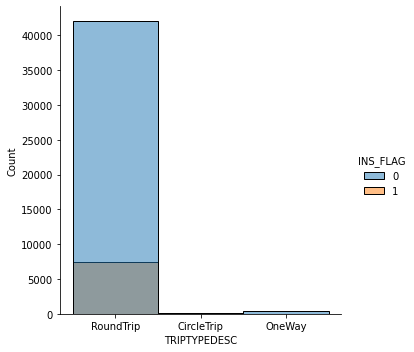

In [75]:
sns.displot(df, x="TRIPTYPEDESC", hue="INS_FLAG")

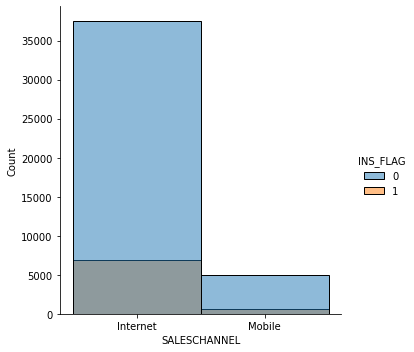

In [76]:
sns.displot(df, x="SALESCHANNEL", hue="INS_FLAG")

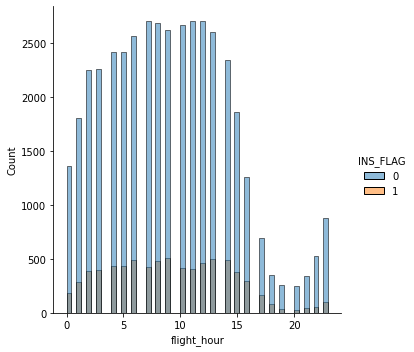

In [77]:
sns.displot(df, x="flight_hour", hue="INS_FLAG")

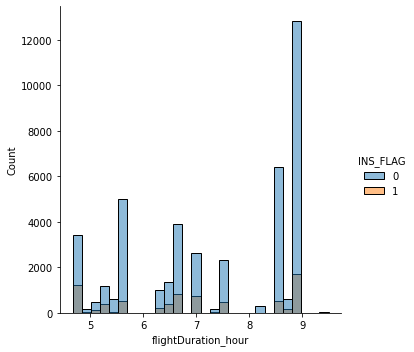

In [78]:
sns.displot(df, x="flightDuration_hour", hue="INS_FLAG")

## Correlation 

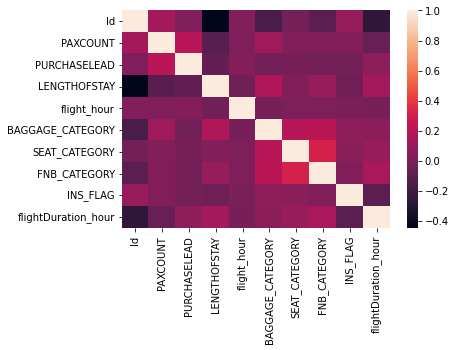

In [79]:
sns.heatmap(df.corr());

In [80]:
df.corr().round(2)

,Id,PAXCOUNT,PURCHASELEAD,LENGTHOFSTAY,flight_hour,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
Id,1.00,0.14,0.02,-0.45,0.03,-0.17,-0.02,-0.11,0.10,-0.27
PAXCOUNT,0.14,1.00,0.21,-0.12,0.02,0.12,0.03,0.02,0.02,-0.06
PURCHASELEAD,0.02,0.21,1.00,-0.08,0.04,-0.02,-0.00,-0.02,-0.02,0.07
LENGTHOFSTAY,-0.45,-0.12,-0.08,1.00,-0.02,0.18,0.03,0.10,-0.04,0.14
flight_hour,0.03,0.02,0.04,-0.02,1.00,-0.01,0.01,0.01,0.01,-0.00
BAGGAGE_CATEGORY,-0.17,0.12,-0.02,0.18,-0.01,1.00,0.21,0.22,0.07,0.06
SEAT_CATEGORY,-0.02,0.03,-0.00,0.03,0.01,0.21,1.00,0.32,0.05,0.10
FNB_CATEGORY,-0.11,0.02,-0.02,0.10,0.01,0.22,0.32,1.00,0.03,0.15
INS_FLAG,0.10,0.02,-0.02,-0.04,0.01,0.07,0.05,0.03,1.00,-0.11
flightDuration_hour,-0.27,-0.06,0.07,0.14,-0.00,0.06,0.10,0.15,-0.11,1.00


## Outlier detection 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


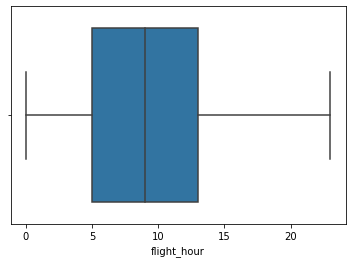

In [81]:
sns.boxplot(df['flight_hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


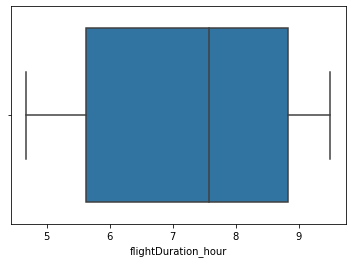

In [82]:
sns.boxplot(df['flightDuration_hour']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


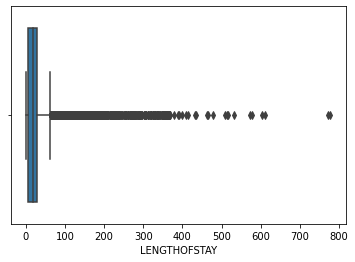

In [83]:
sns.boxplot(df['LENGTHOFSTAY']) 

In [84]:
print(np.where(df['LENGTHOFSTAY']>100))

(array([   18,    67,    69, ..., 25515, 25530, 25572]),)


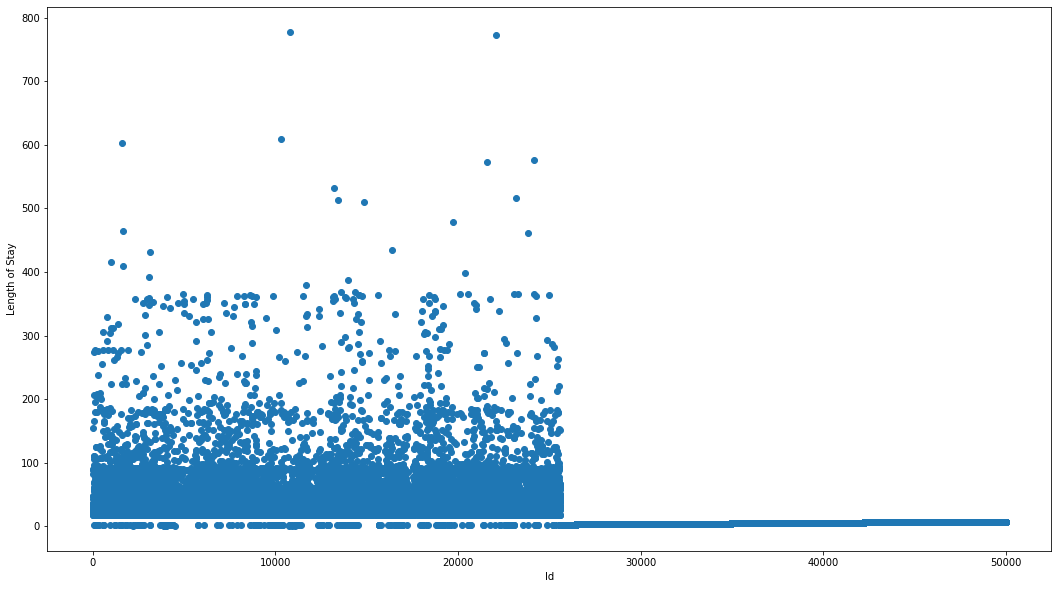

In [85]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))

ax.scatter(df['Id'], df['LENGTHOFSTAY'])
  
# x-axis label
ax.set_xlabel('Id')
  
# y-axis label
ax.set_ylabel('Length of Stay')
plt.show()